In [1]:
import pandas as pd
import csv
from loader import *
from pair_finder import *
import time
from random import seed
import keyboard
from random import seed
from random import randint
import math

In [2]:
ratings_path_s = "DATA\\ratings_100users_shuffled.csv"
ratings_path = "DATA\\ratings_100users.csv"
movies_path =  "DATA\\movies.csv"

MinScore = 4
MaxCombo = 4
MinConfidence = 0.5
MinLift = -1
MaxLift = -1
MinFrequency = 0.1
#ratings_stream = createRatingsStream(ratings_path_s, MinScore)
userBaskets= CreateMovieBaskets(ratings_path, MinScore)
movies_df = ReadMovies(movies_path)

In [19]:
combos = myApriori(userBaskets, MinFrequency, MaxCombo)
rules = generate_all_rules(combos, MinConfidence, MinLift, MaxLift)

1 ---------------------> 140
2 ---------------------> 509
3 ---------------------> 629
4 ---------------------> 368


In [20]:
rules

,itemset,rule,hypothesis,conclusion,frequency,confidence,lift,interest,rule ID
0,"[260, 2571, 2858]","[260, 2571]-->[2858]","[260, 2571]",[2858],0.13,0.520000,2.363636,-0.09,1
1,"[260, 2571, 2858]","[260, 2858]-->[2571]","[260, 2858]",[2571],0.13,0.812500,2.195946,-0.24,2
2,"[260, 2571, 2858]","[2858]-->[260, 2571]",[2858],"[260, 2571]",0.13,0.590909,2.363636,-0.12,3
3,"[260, 2571, 2858]","[2571, 2858]-->[260]","[2571, 2858]",[260],0.13,0.866667,2.342342,-0.24,4
4,"[260, 527, 593]","[527, 593]-->[260]","[527, 593]",[260],0.11,0.785714,2.123552,-0.26,5
...,...,...,...,...,...,...,...,...,...
855,"[260, 589, 1610]","[589, 1610]-->[260]","[589, 1610]",[260],0.10,1.000000,2.702703,-0.27,856
856,"[260, 589, 1610]","[1610]-->[260, 589]",[1610],"[260, 589]",0.10,0.769231,4.273504,-0.08,857
857,"[260, 1221, 1610]","[1221, 1610]-->[260]","[1221, 1610]",[260],0.10,1.000000,2.702703,-0.27,858
858,"[260, 1221, 1610]","[1221]-->[260, 1610]",[1221],"[260, 1610]",0.10,0.526316,4.048583,-0.03,859


In [5]:
import matplotlib.pyplot as plt
import numpy as np

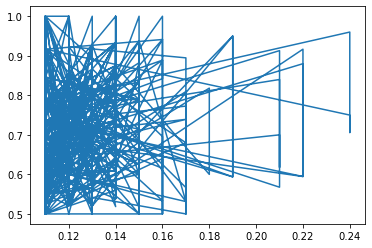

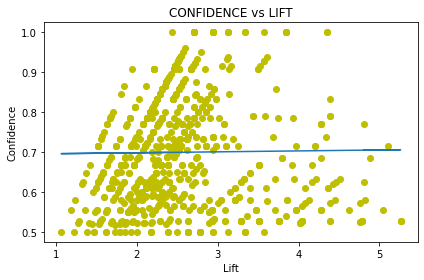

In [21]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit) 
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules_df['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('CONFIDENCE vs LIFT')
plt.tight_layout()
plt.show()

In [7]:
import draw_rules_graph as dr

In [8]:
rules.head()

,itemset,rule,hypothesis,conclusion,frequency,confidence,lift,interest,rule ID
0,"[260, 2571, 2858]","[260, 2571]-->[2858]","[260, 2571]",[2858],0.13,0.520000,2.363636,-0.09,1
1,"[260, 2571, 2858]","[260, 2858]-->[2571]","[260, 2858]",[2571],0.13,0.812500,2.195946,-0.24,2
2,"[260, 2571, 2858]","[2858]-->[260, 2571]",[2858],"[260, 2571]",0.13,0.590909,2.363636,-0.12,3
3,"[260, 2571, 2858]","[2571, 2858]-->[260]","[2571, 2858]",[260],0.13,0.866667,2.342342,-0.24,4
4,"[260, 527, 593]","[527, 593]-->[260]","[527, 593]",[260],0.11,0.785714,2.123552,-0.26,5


Node size & color coding:
	[Rule-Node Size] 4 : lift>7, 3 : lift>6, 2 : lift>5, 1 : default
	[Rule-Node Color] purple : conf>0.9, blue : conf>0.75, cyan : conf>0.6, green  : default
	[Movie-Node Size] 0.7
	[Movie-Node Color] yellow


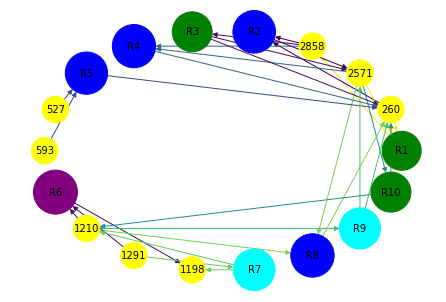

In [15]:
dr.draw_graph(rules,10, "c")

In [142]:
import math
import numpy as np
l_max = rules['lift'].max() + 0.5
l_min = rules['lift'].min() - 0.5
c_max = rules['confidence'].max() + 0.05
c_min = rules['confidence'].min() - 0.05

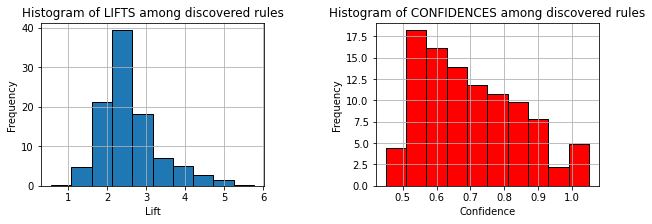

In [147]:
l_max = rules['lift'].max() + 0.5
l_min = rules['lift'].min() - 0.5
c_max = rules['confidence'].max() + 0.05
c_min = rules['confidence'].min() - 0.05



f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax.hist(rules.lift, weights=rules.frequency, bins=np.arange(l_min,l_max,0.5), range = (l_min, l_max), edgecolor='black')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Histogram of LIFTS among discovered rules')
plt.grid()

ax2 = f.add_subplot(122)
ax2.hist(rules.confidence, weights=rules.frequency,bins=np.arange(c_min,c_max,0.05), edgecolor='black', color='red')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of CONFIDENCES among discovered rules')
plt.grid()

plt.subplots_adjust(wspace=0.5)
f.show()

In [4]:
x = frozenset([1,2,3,4,5])
for i in x:
    print(i)

1
2
3
4
5
